<a href="https://colab.research.google.com/github/Ashu156/JLab/blob/main/JL_Linear_track_reward_rate_monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd
import io

In [91]:
from google.colab import files
uploaded = files.upload()
df = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Raw data with gaps')
print(df)

Saving Reward rates.xlsx to Reward rates (8).xlsx
    XFN1  XFN2  XFN3  XFN4
0   0.53  0.63  0.78  1.00
1    NaN   NaN   NaN   NaN
2    NaN   NaN   NaN   NaN
3   0.76  0.90  1.05  0.62
4   1.25  1.10  1.45  1.48
5   1.96  1.58  1.79  2.10
6   2.05  2.57  1.40  2.26
7   1.57  0.67  2.24  3.17
8   3.30  3.00  1.65  3.10
9   3.36  2.65  2.14  3.85
10   NaN   NaN   NaN   NaN
11   NaN   NaN   NaN   NaN
12  4.86  4.15  2.81  3.80
13  2.71  3.35  3.10  4.40
14  2.80  4.24  3.55  5.33
15  4.92  4.90  4.92  2.24
16  3.52  5.86  3.70  5.33
17  3.76  4.17  2.67  4.92
18  4.38  4.95  3.92  5.09
19  3.13  2.50  2.88  4.55
20  4.95  5.80  4.82  5.70
21  4.09  5.30  5.14  5.40


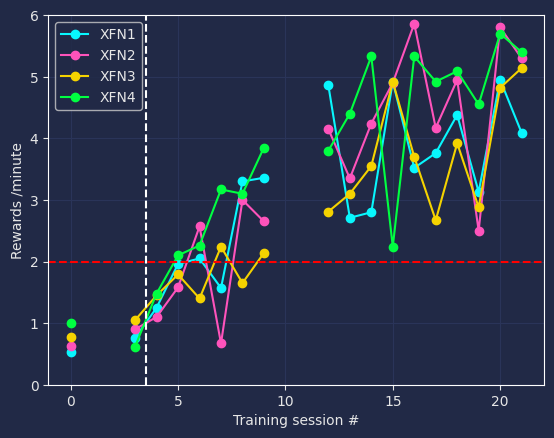

In [74]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")
for param in ['text.color', 'axes.labelcolor', 'xtick.color', 'ytick.color']:
    plt.rcParams[param] = '0.9'  # very light grey
for param in ['figure.facecolor', 'axes.facecolor', 'savefig.facecolor']:
    plt.rcParams[param] = '#212946'  # bluish dark grey
colors = [
    '#08F7FE',  # teal/cyan
    '#FE53BB',  # pink
    '#F5D300',  # yellow
    '#00ff41',  # matrix green
]
fig, ax = plt.subplots()
df.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training session #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels([])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

In [92]:
df2 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Grand average')
df3 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Grand SEM')
df4 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Daily average')
df5 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Daily average without gaps')
df6 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Raw data without gaps')
df7 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Sessionwise daily performance')
df8 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Daily sessionwise mean')
df9 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Daily sessionwise SEM')
df10 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Daily 1st session mean')
# df11 = pd.read_excel(io.BytesIO(uploaded['Reward rates.xlsx']), sheet_name = 'Daily 2nd session mean')
# average = df2.iloc[[0]]
# print(average)
# yerr1 = df2.iloc[[1]]
# print(yerr1)
# yerr2= yerr1.iloc[:, ::-1]
# print(yerr2)

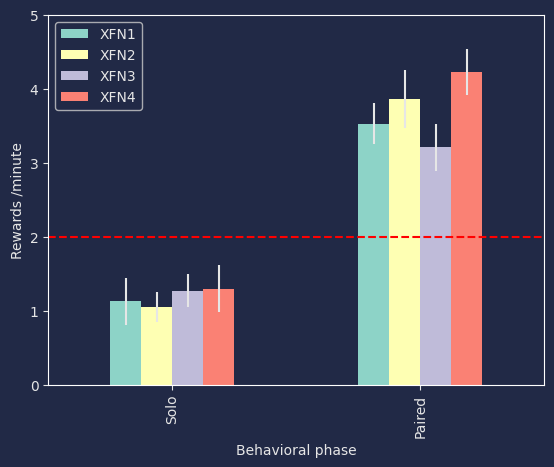

In [77]:
ax = df2.plot(kind='bar', yerr = df3, align='center')

# ax.grid(color='#2A3459')
# ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 5.0])
ax.set_xlabel('Behavioral phase')
ax.set_ylabel('Rewards /minute'), 
ax.set_xticklabels(['Solo', 'Paired'])
ax.axhline(2.0, linestyle='--', color = 'red')

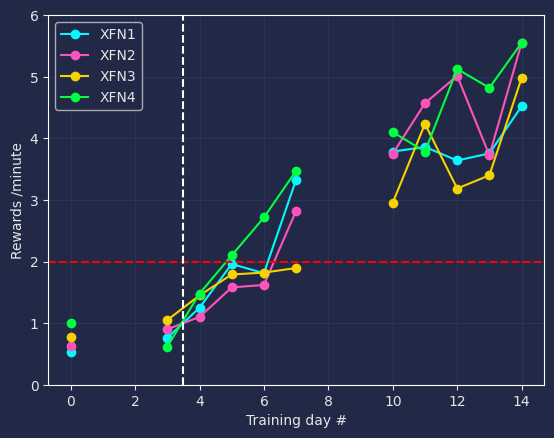

In [78]:
fig, ax = plt.subplots()
df4.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training day #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

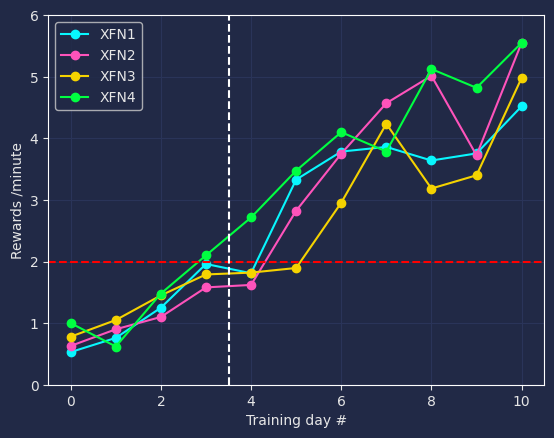

In [79]:
fig, ax = plt.subplots()
df5.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training day #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

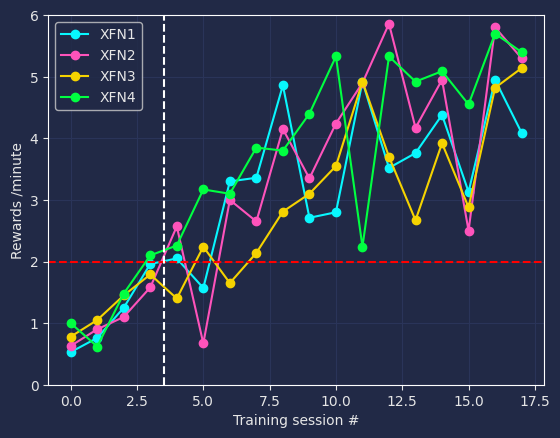

In [80]:
fig, ax = plt.subplots()
df6.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training session #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

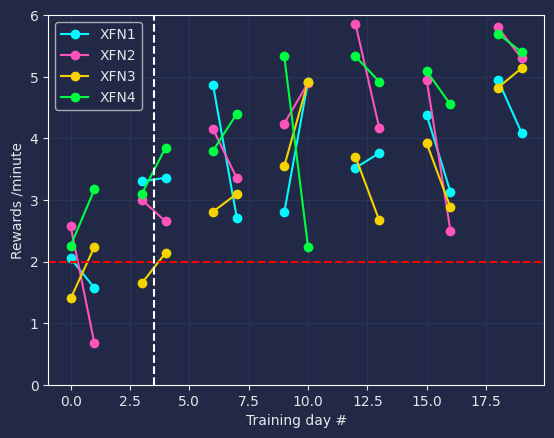

In [81]:
fig, ax = plt.subplots()
df7.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training day #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')

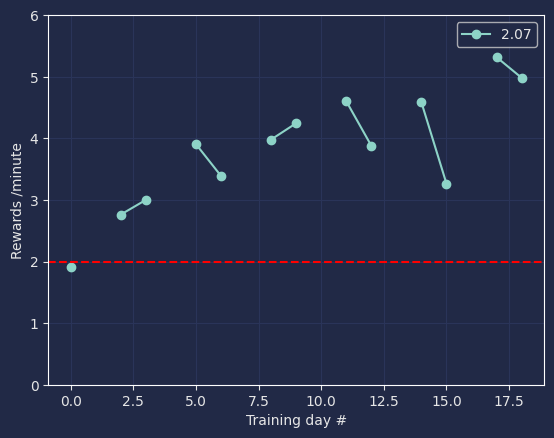

In [83]:
fig, ax = plt.subplots()
df8.plot(marker='o', ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training day #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')

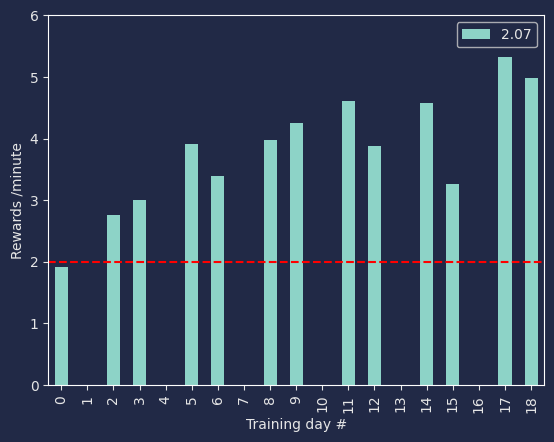

In [84]:
fig, ax = plt.subplots()
df8.plot(kind='bar', yerr = df9, ax=ax)

# ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([-0.0, 6.0])
ax.set_xlabel('Training day #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
ax.axhline(2.0, linestyle='--', color = 'red')

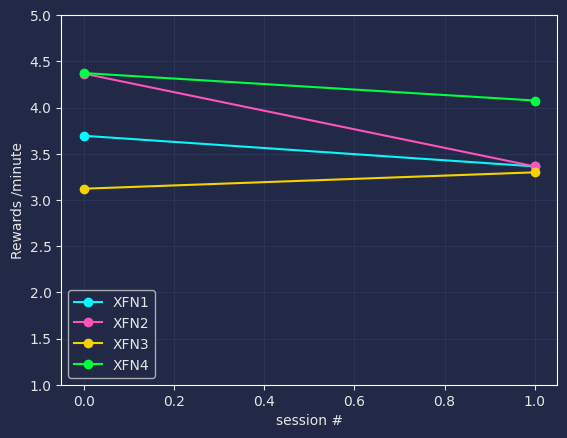

In [93]:
fig, ax = plt.subplots()
df10.plot(marker='o', color=colors, ax=ax)

ax.grid(color='#2A3459')
ax.set_xlim([ax.get_xlim()[0], ax.get_xlim()[1]])  # to not have the markers cut off
ax.set_ylim([1.0, 5.0])
ax.set_xlabel('session #')
ax.set_ylabel('Rewards /minute'), 
# ax.set_xticklabels(['0', '1', '2'])
# ax.axhline(2.0, linestyle='--', color = 'red')
ax.axvline(3.5, linestyle='--', color = 'white')